In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/feature/knn_clustering.csv')
df1 = pd.read_csv('../../data/p_content.csv')
result = pd.merge(df, df1, on="ID_GodotObject")
result['publishingDate'] = pd.to_datetime(result['publishingDate'])
#result.set_index('publishingDate', inplace=True)
print(result.shape)
print(result.dtypes)
result.head()

(103, 9)
ID_GodotObject             int64
cluster_value              int64
author                    object
source                    object
publishingDate    datetime64[ns]
content                   object
titletext                 object
merged_text               object
tokens                    object
dtype: object


,ID_GodotObject,cluster_value,author,source,publishingDate,content,titletext,merged_text,tokens
0,2000115059032,5,(keine Angabe),Redaktion,2020-02-26 16:50:27.000,﻿20sars-cov-2maskenpflicht medizinisch Persona...,Maskenpflicht medizinisch Personal Umgang Coro...,﻿20sars-cov-2maskenpflicht medizinisch_Persona...,"['\ufeff20sars-cov-2maskenpflicht', 'medizinis..."
1,2000116305030,3,(keine Angabe),Redaktion,2020-03-30 05:36:31.240,﻿20 Coronavirus schrittweise Einführung Masken...,schrittweise Einführung Maskenpflicht Öffentli...,﻿20_Coronavirus schrittweise Einführung Masken...,"['\ufeff20_Coronavirus', 'schrittweise', 'Einf..."
2,2000116325081,6,(keine Angabe),Redaktion,2020-03-30 13:17:32.120,﻿20kein Ende Sicht Regierung setzen Maske bei ...,Regierung setzen Maske bei Einkauf Test freis...,﻿20kein Ende Sicht Regierung setzen Maske bei ...,"['\ufeff20kein', 'Ende', 'Sicht', 'Regierung',..."
3,2000116346340,4,(keine Angabe),Redaktion,2020-03-31 05:34:39.260,﻿20 Coronavirus Maskenpflicht Supermarkt späte...,Maskenpflicht Supermarkt spätestens ab Montag ...,﻿20_Coronavirus Maskenpflicht Supermarkt späte...,"['\ufeff20_Coronavirus', 'Maskenpflicht', 'Sup..."
4,2000116371728,2,(keine Angabe),Redaktion,2020-03-31 16:15:23.100,﻿20 Coronavirus Sonderbeauftragter Clemens Aue...,Sonderbeauftragter Clemens Auer italienisch ...,﻿20_Coronavirus Sonderbeauftragter Clemens Aue...,"['\ufeff20_Coronavirus', 'Sonderbeauftragter',..."


In [3]:
df2 = result[['publishingDate', 'cluster_value']]
df2['month'] = df2['publishingDate'].dt.month
df2['year'] = df2['publishingDate'].dt.year
df2.head()

/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_7307/699861094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2['publishingDate'].dt.month
/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_7307/699861094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['publishingDate'].dt.year


,publishingDate,cluster_value,month,year
0,2020-02-26 16:50:27.000,5,2,2020
1,2020-03-30 05:36:31.240,3,3,2020
2,2020-03-30 13:17:32.120,6,3,2020
3,2020-03-31 05:34:39.260,4,3,2020
4,2020-03-31 16:15:23.100,2,3,2020


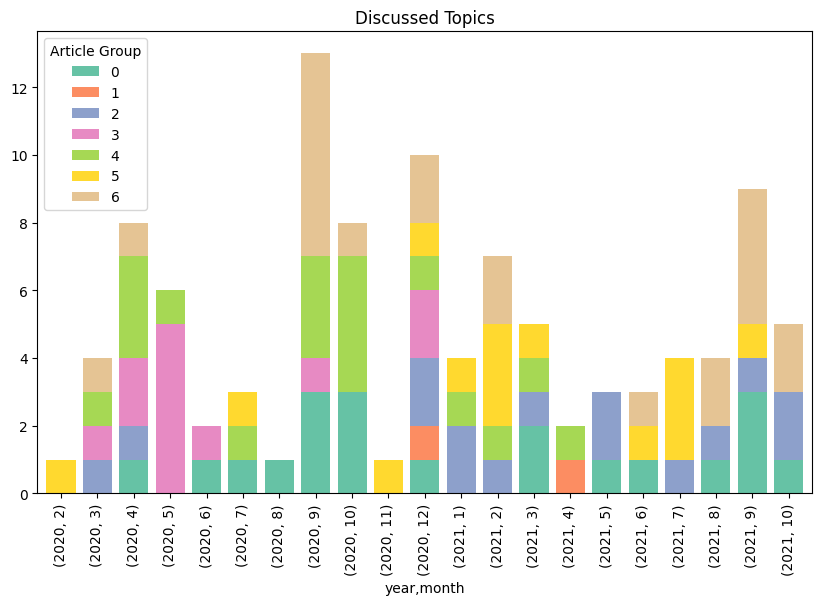

In [33]:
#df2.columns = ['Article Group' if x=='gdp' else x for x in df.columns]
df_gb = df2.groupby(['year', 'month', 'cluster_value']).size().unstack(level=2)
#colors = [plt.cm.Spectral(i/float(6)) for i in range(7)]
df_gb.plot(kind='bar', stacked=True, figsize=(10,6), color=plt.cm.Set2.colors, width=0.8)
# Get the legend object
legend = plt.legend()
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
# Change the legend title
legend.set_title('Article Group')
# Add a title to the plot
plt.title('Discussed Topics')

# Show the plot
plt.savefig('cluster-dist-plot.png', bbox_inches='tight', dpi=300)
plt.show()

In [15]:
#sentiment Plot
df3 = pd.read_csv('../../data/feature/sentiws_content.csv')
result1 = pd.merge(df1, df3, on="ID_GodotObject")[['publishingDate','sentiment_content']]
result1['publishingDate'] = pd.to_datetime(result1['publishingDate'])
# Set the 'date' column as the index
result1.set_index('publishingDate', inplace=True)
result1.head()


,sentiment_content
publishingDate,
2020-02-26 16:50:27.000,-0.009879
2020-03-30 05:36:31.240,-0.003284
2020-03-30 13:17:32.120,-0.003215
2020-03-31 05:34:39.260,-0.004438
2020-03-31 16:15:23.100,-0.000051


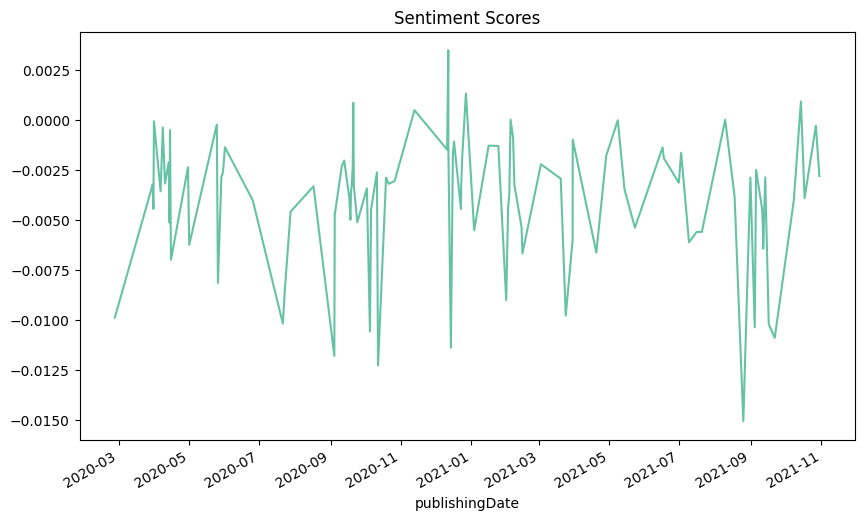

In [27]:
result1.plot(kind='line', color=plt.cm.Set2.colors, legend=False, figsize=(10,6))
# Add a title to the plot
plt.title('Sentiment Scores')

# Show the plot
plt.savefig('sentiment-plot.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
#TF IDS Plot with importand words
